# PCY

### O algoritmo PCY (Pairwise Counting) é uma técnica de mineração de dados frequentemente usada para encontrar pares de itens frequentes em grandes conjuntos de dados. Ele é uma extensão do algoritmo Apriori e é projetado para lidar com o desafio de memória associado ao Apriori quando aplicado a grandes conjuntos de dados.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Alguns aspectos importantes do algoritmo PCY:

#### **Hashing de pares:** O PCY utiliza uma técnica de hashing para reduzir a quantidade de memória necessária para armazenar informações sobre os pares de itens frequentes. Em vez de manter uma tabela gigante de contagens de pares, o PCY usa uma estrutura de dados menor, geralmente chamada de "bitmap", para rastrear se um determinado par de itens apareceu frequentemente juntos.

#### **Duas passagens:** O algoritmo PCY consiste em duas passagens pelos dados. Na primeira passagem, ele conta a frequência dos itens únicos (singletons) e dos pares de itens. Na segunda passagem, ele usa o bitmap gerado na primeira passagem para identificar os pares de itens que têm uma alta probabilidade de serem frequentes.

#### **Redução da memória:** O uso de hashing de pares e o bitmap permite que o PCY trabalhe com conjuntos de dados muito grandes sem consumir uma quantidade excessiva de memória. Isso é particularmente útil em casos em que a contagem de pares de itens frequentes seria proibitivamente grande para armazenar em memória.

#### **Eficiência e escalabilidade:** Devido à sua abordagem de redução de memória, o algoritmo PCY é eficiente e escalável para grandes conjuntos de dados. Ele pode lidar com milhões ou até bilhões de transações de forma eficaz, o que o torna uma escolha popular em muitos cenários da vida real, como análise de cestas de compras, recomendação de produtos e análise de padrões de comportamento do usuário.

#### No entanto, é importante notar que o PCY não é isento de desafios. Ele pode não ser tão eficiente quanto outros algoritmos em certos tipos de dados ou em determinadas configurações. Além disso, a escolha dos parâmetros, como o tamanho do bitmap e o threshold de suporte, pode afetar significativamente o desempenho e os resultados do algoritmo. Portanto, é importante ajustar cuidadosamente esses parâmetros para obter os melhores resultados em um determinado conjunto de dados e cenário de aplicação.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Não existe uma lib Python para implementar o PCY, mas escontrei esta implementação no GitHub. Foram feitos alguns ajustes.

In [1]:
# Disponível em: https://github.com/adwansyed/Data-Mining-PCY/blob/master/pcy.py

# @title: PCY
# @author: Adwan Salahuddin Syed


import time
import itertools
import pandas as pd

# Define o número de baldes para a hash table
num_buckets = 100
num_baskets = 100
support_threshold = 0.50

# Função de hash para os pares
def hash_pair(n1, n2):
    return ((n1 * n1) + (n2 * n2)) % num_buckets

def pcy(baskets, tHold, start):
    # Contadores para singletons e pares
    singletons = {}
    pairs_hashtable = {}
    frequent_pairs = {}
    bitmap = [0] * num_buckets

    ##### PASS 1 ###################################################################
    for transaction in baskets:
        items = [str(idx) for idx, val in enumerate(transaction) if val == 1]  # Índices de colunas com valor 1
        # Contagem de singletons
        for item in items:
            if item not in singletons:
                singletons[item] = 1
            else:
                singletons[item] += 1

        # Contagem de pares
        for pair in itertools.combinations(items, 2):
            pair = tuple(sorted(pair))
            hash_value = hash_pair(int(pair[0]), int(pair[1]))
            if hash_value not in pairs_hashtable:
                pairs_hashtable[hash_value] = 1
            else:
                pairs_hashtable[hash_value] += 1

    # Prune frequent singletons
    frequent_singletons = [item for item in singletons if singletons[item] >= (len(baskets) * tHold)]

    ##### BETWEEN PASSES ###########################################################
    for key in pairs_hashtable:
        if pairs_hashtable[key] >= 2:
            bitmap[key] = 1

    ##### PASS 2 ###################################################################
    for transaction in baskets:
        items = [str(idx) for idx, val in enumerate(transaction) if val == 1]
        for pair in itertools.combinations(items, 2):
            pair = tuple(sorted(pair))
            if all(item in frequent_singletons for item in pair):
                hash_value = hash_pair(int(pair[0]), int(pair[1]))
                if bitmap[hash_value] > 0:
                    candidate_pair = f"{pair[0]}, {pair[1]}"
                    if candidate_pair not in frequent_pairs:
                        frequent_pairs[candidate_pair] = 1
                    else:
                        frequent_pairs[candidate_pair] += 1

    # Filtrar pares frequentes com base no suporte
    frequent_pairs = {pair: count for pair, count in frequent_pairs.items() if count >= (len(baskets) * tHold)}

    print(frequent_pairs)
    print(" ")
    print(time.time() - start, ': Generated frequent pairs')

def run(tHold, num_baskets, file_name):
    # Carregar o arquivo CSV
    df = pd.read_csv(file_name)

    # Converter True/False para 1/0
    df = df.applymap(lambda x: 1 if x == True else 0)

    # Converter DataFrame para lista de transações
    transactions = df.values.tolist()
    
    num_lines = len(transactions)
    print('Number of lines:', num_lines)
    
    basket_size = num_lines // num_baskets
    print('Basket size:', basket_size)

    list_of_baskets = []
    for i in range(0, num_lines, basket_size):
        list_of_baskets.append(transactions[i:i + basket_size])

    print('Number of baskets:', len(list_of_baskets))

    total_time = 0
    for i in range(len(list_of_baskets)):
        start = time.time()
        pcy(list_of_baskets[i], tHold, start)
        end = time.time()
        print('Time taken in seconds for basket %d:' % (i), end - start)
        total_time += (end - start)
    
    print('Total time taken to run:', total_time)

    df.to_csv("datasets/PCY_binário.csv", index=False)

# Chame a função run com o nome do seu arquivo CSV
run(support_threshold, num_baskets, 'datasets/Apriori.csv')




C:\Users\admin\AppData\Local\Temp\ipykernel_18396\764585373.py:80: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == True else 0)


Number of lines: 52494
Basket size: 524
Number of baskets: 101
{'0, 21': 297, '0, 33': 268, '0, 49': 297, '2, 21': 295, '2, 30': 285, '2, 33': 289, '2, 49': 295, '18, 21': 339, '18, 27': 281, '18, 30': 262, '18, 33': 295, '18, 49': 339, '18, 55': 276, '21, 23': 330, '21, 27': 405, '21, 30': 423, '21, 33': 467, '21, 38': 271, '21, 42': 283, '21, 46': 298, '21, 49': 524, '21, 53': 290, '21, 55': 426, '21, 59': 345, '23, 30': 274, '23, 33': 306, '23, 49': 330, '23, 55': 268, '27, 30': 329, '27, 33': 369, '27, 49': 405, '27, 55': 330, '27, 59': 271, '30, 33': 401, '30, 49': 423, '30, 55': 346, '30, 59': 278, '33, 49': 467, '33, 53': 263, '33, 55': 374, '33, 59': 313, '38, 49': 271, '42, 49': 283, '46, 49': 298, '49, 53': 290, '49, 55': 426, '49, 59': 345, '53, 59': 279, '55, 59': 289, '21, 61': 335, '30, 61': 271, '33, 61': 292, '49, 61': 335, '55, 61': 329}
 
0.09508061408996582 : Generated frequent pairs
Time taken in seconds for basket 0: 0.09508061408996582
{'19, 2': 308, '2, 21': 308,

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Baskets** (cestos):

#### Em mineração de dados, um "basket" refere-se a uma unidade de transação ou uma linha em um conjunto de dados transacionais. Cada "basket" contém um conjunto de itens ou atributos que estão associados em uma transação específica. Por exemplo, em um conjunto de dados de compras de supermercado, cada "basket" pode representar uma compra única, onde os itens comprados são os elementos do "basket". Nos algoritmos de mineração de regras de associação, como o Apriori, os "baskets" são a entrada para o algoritmo, e o objetivo é descobrir padrões de associação frequentes entre os itens em diferentes "baskets".



-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### **Buckets** (recipientes):

#### Em algoritmos de mineração de regras de associação, como o PCY (Pass-Counting with Dynamic Hashing), os "buckets" são usados para implementar uma técnica de filtragem para reduzir o espaço de busca. Essa técnica, conhecida como "hash-bucket filtering", é usada para reduzir a quantidade de candidatos a pares frequentes que precisam ser considerados. Cada "bucket" contém uma lista de pares de itens (ou hashes desses pares), e um contador associado que rastreia quantas vezes esses pares ocorreram em todo o conjunto de dados. Essa estrutura de dados permite uma verificação eficiente de candidatos a pares frequentes durante a execução do algoritmo PCY.

### Este código irá gerar um gráfico de barras horizontal mostrando os pares de itens frequentes e suas frequências. Você pode ajustar o tamanho do gráfico, as cores, os rótulos e outros aspectos de acordo com suas preferências.

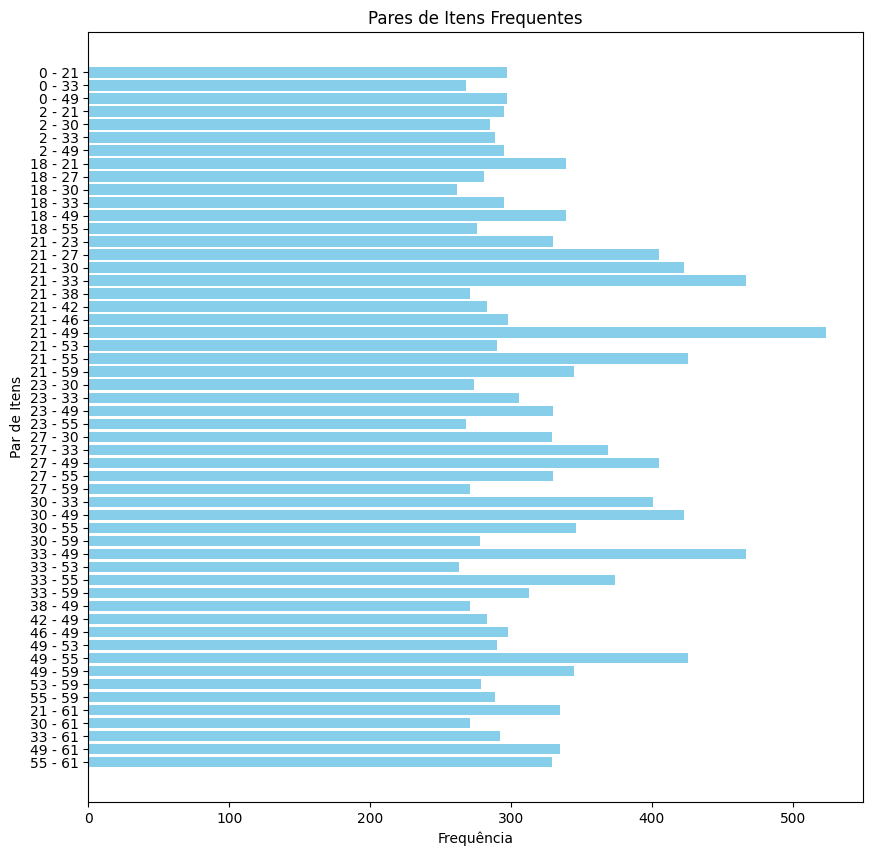

In [2]:
import matplotlib.pyplot as plt

# Pares frequentes encontrados pelo algoritmo PCY
frequent_pairs = {
    '0, 21': 297, '0, 33': 268, '0, 49': 297, '2, 21': 295, '2, 30': 285, 
    '2, 33': 289, '2, 49': 295, '18, 21': 339, '18, 27': 281, '18, 30': 262, 
    '18, 33': 295, '18, 49': 339, '18, 55': 276, '21, 23': 330, '21, 27': 405, 
    '21, 30': 423, '21, 33': 467, '21, 38': 271, '21, 42': 283, '21, 46': 298, 
    '21, 49': 524, '21, 53': 290, '21, 55': 426, '21, 59': 345, '23, 30': 274, 
    '23, 33': 306, '23, 49': 330, '23, 55': 268, '27, 30': 329, '27, 33': 369, 
    '27, 49': 405, '27, 55': 330, '27, 59': 271, '30, 33': 401, '30, 49': 423, 
    '30, 55': 346, '30, 59': 278, '33, 49': 467, '33, 53': 263, '33, 55': 374, 
    '33, 59': 313, '38, 49': 271, '42, 49': 283, '46, 49': 298, '49, 53': 290, 
    '49, 55': 426, '49, 59': 345, '53, 59': 279, '55, 59': 289, '21, 61': 335, 
    '30, 61': 271, '33, 61': 292, '49, 61': 335, '55, 61': 329
}

# Extrair itens e suas frequências
items = [pair.split(', ') for pair in frequent_pairs.keys()]
frequencies = list(frequent_pairs.values())

# Plotar gráfico de barras
plt.figure(figsize=(10, 10))
plt.barh(range(len(items)), frequencies, color='skyblue')
plt.yticks(range(len(items)), [f'{pair[0]} - {pair[1]}' for pair in items])
plt.xlabel('Frequência')
plt.ylabel('Par de Itens')
plt.title('Pares de Itens Frequentes')
plt.gca().invert_yaxis()  # Inverter eixo y para começar com o par mais frequente
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### - **Pares:** No contexto da mineração de dados, os "pares" referem-se a combinações de dois itens que ocorrem juntos em transações. Neste exemplo específico, estamos olhando para os pares de itens frequentes encontrados em um conjunto de dados. Cada par consiste em dois itens que são frequentemente comprados ou ocorrem juntos em transações.

### --Exemplo** -> '0, 21': 297:

#### -> **'0, 21'**: Este é um par de itens. O primeiro item é representado pelo número '0' e o segundo item pelo número '21'. No contexto de uma aplicação real, esses números podem ser substituídos por nomes de produtos, por exemplo. Portanto, este par '0, 21' indica que os itens 0 e 21 estão frequentemente associados um ao outro.
#### -> **297**: Este é o número de vezes que o par '0, 21' ocorreu juntos em transações. Isso indica a frequência com que esses dois itens foram comprados ou ocorreram juntos em transações no conjunto de dados analisado. Neste caso, '0, 21' ocorreu 297 vezes.

#### Em resumo, a notação '0, 21': 297 nos diz que o par de itens '0' e '21' ocorreu juntos em 297 transações. Este é um exemplo de um par de itens frequentes encontrado pelo algoritmo de mineração de dados.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Os resultados indicam que foram encontrados pares frequentes no conjunto de dados após a execução do algoritmo PCY.

#### "Number of lines": O número total de linhas no arquivo de dados é 52494.
#### "Basket size": O tamanho médio de cada cesto é de aproximadamente 524.
#### "Number of baskets": Existem 101 cestos no total.
#### O tempo total de execução do algoritmo para todos os cestos foi de aproximadamente 9.82 segundos.

### Esses resultados indicam que o algoritmo PCY foi aplicado com sucesso ao conjunto de dados e foi capaz de identificar pares frequentes com base no suporte mínimo especificado. Agora, você pode analisar esses pares frequentes para extrair insights sobre associações ou padrões no seu conjunto de dados.